<a href="https://colab.research.google.com/github/emmab-collab/Machine-Learning/blob/main/Heart_failure_detection_EDA_%2B_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Définir un objectif mesurable
## Objectif



## Métrique

- accuracy(précision) TP/(TP+FP) -> on veut pas de faux positifs, on veut pas envoyer à l'hôpital pour rien
- recall(sensibilité) TP/(TP+FN) -> on veut pas de faux négatifs, on veut surtout pas louper un positif
- F1score

**Métrique** :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [ ]:
link='/kaggle/input/heart-failure-prediction/heart.csv'
data=pd.read_csv(link)
df=data.copy()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# 2. EDA (Exploratory Data Analysis)
**Objectif** : Comprendre au mieux les données pour définir une stratégie de modélisation.

* **Analyse de la forme :**
  * **Identification de la target** : HeartDisease
  * **Nombre de lignes et colonnes** : 918, 12
  * **Type de variables** :
      - qualitatives (5): Sex,ChestPainType,RestingECG,ExerciseAngina (douleur thoracique pendant l'effort), ST_Slope
      - quantitatives (6): Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
  * **Identification des valeurs manquantes** :
    * Aucune valeur manquante



* **Analyse du fond :**
  * **Visualisation de la target** :
    * 55% heart disease 45% sain
  * **Compréhension des différentes variables**
    * Variables continues :
      - **Age**: entre 27 et 77 ans
      - **RestingBP**: (Blood pressure) entre 90 et 200
      - **Cholesterol**: entre 100 et 400 + un pic à 0 ?
      - **FastingBS**: (Blood sugar) binaire : 0 (77%) et 1 (23%)
      - **MaxHR**: entre 60 et 210
      - **Oldpeak**: (si >0 peut indiquer un pb cardiaque) de 0 à 4
    * Variables qualitatives :
      - **Sex** : M:79% F:21%
      - **ChestPainType** : ASY (asymptomatic) 54% , NAP (non anginal) 22% , ATA (atypical) 19% , TA (typical) 5%
      - **RestingECG** : Normal 60% , LVH 20% , ST 20%
      - **ExerciseAngina** : N 60% , Y 40%
      - **ST_Slope** : Flat 50% , Up 43% , Down 7%
  * **Visualisation des relations features-target**:
    * Les personnes ayant un pb cardiaque sont plus agées (56ans vs 50 ans)
    * Les personnes avec pb cardiaque ont une max HR plus faible
    * Il semblerait que les pb cardiaques concernent plus les hommes que les femmes
    * Plus de pb cardiaque chez les asymptomatiques (ChestPainType)
    * Plus de pb cardiaque chez ceux qui ont des douleurs thoraciques pendant l'effort
    * Plus de pb cardiaque chez les flat slope
  * **Identification des outliers**

## **1. Identification de la target**

In [ ]:
target_feature='HeartDisease'

## **2. Type de variables**

In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## **3. Analyse des Valeurs manquantes**

<Axes: >

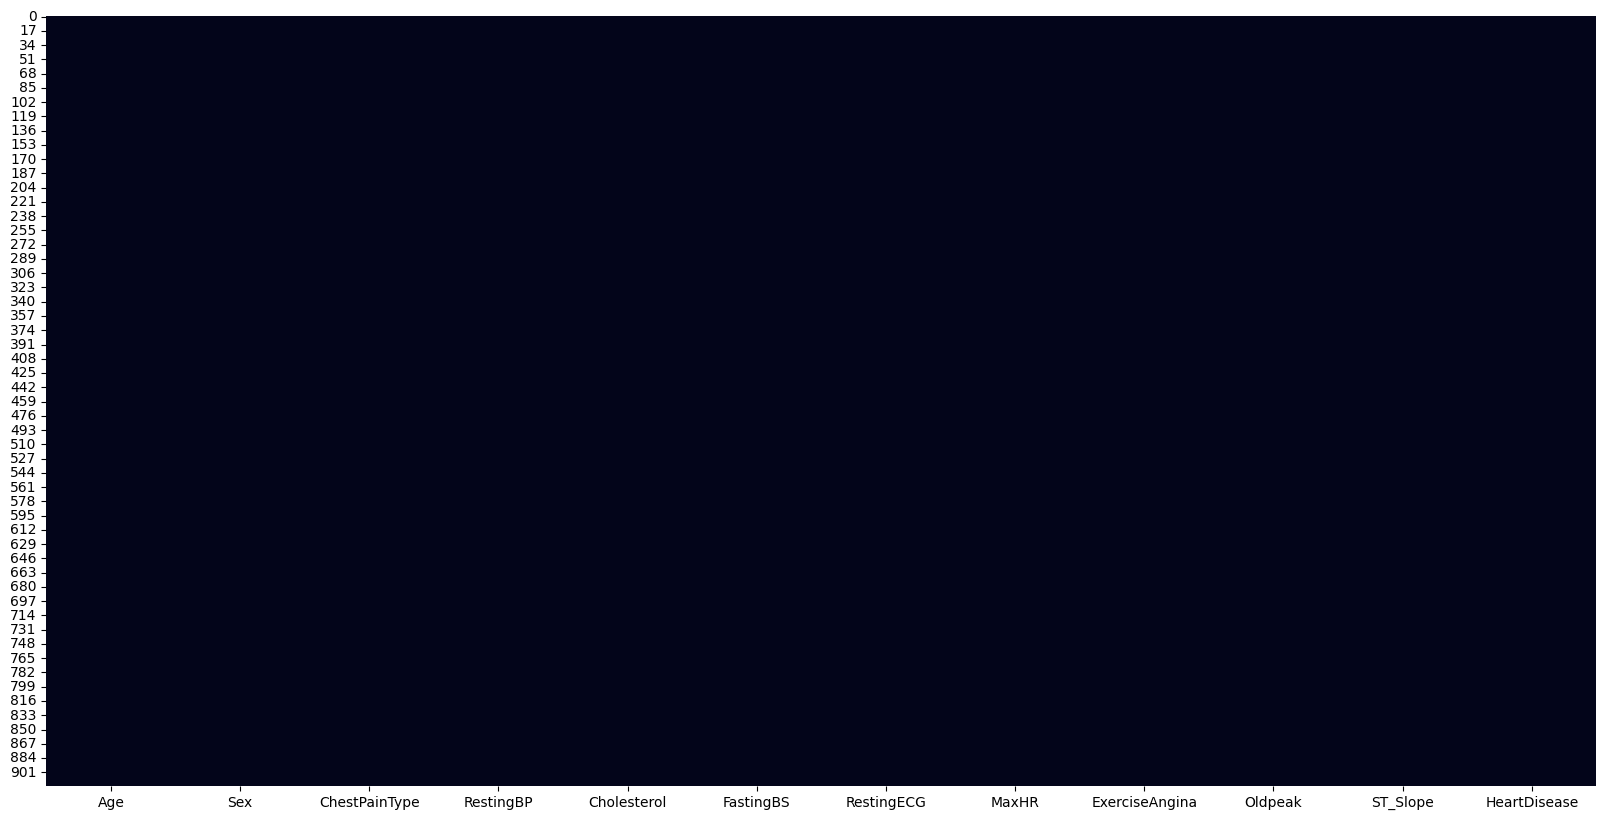

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

## **4. Visualisation de la target**

In [ ]:
print(f'Répartition de {target_feature} :\n')
df[target_feature].value_counts(normalize=True)

Répartition de HeartDisease :



HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

## **5. Visualisation des variables continues**

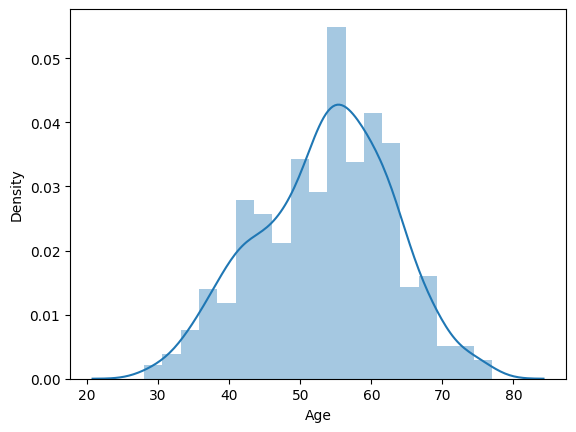

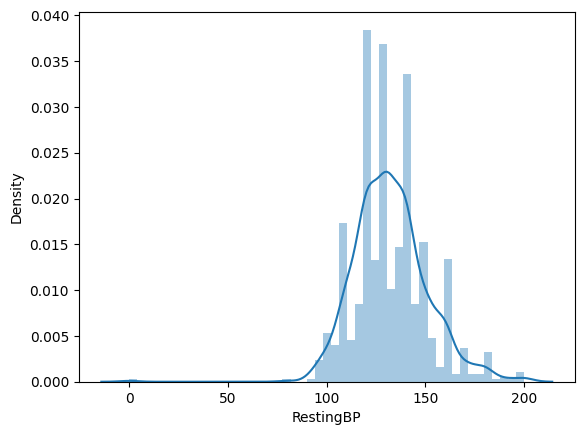

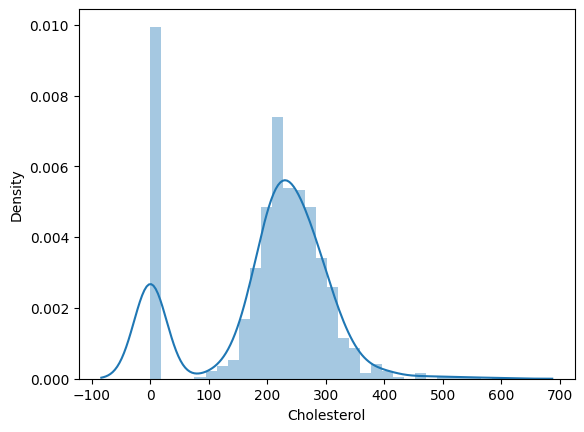

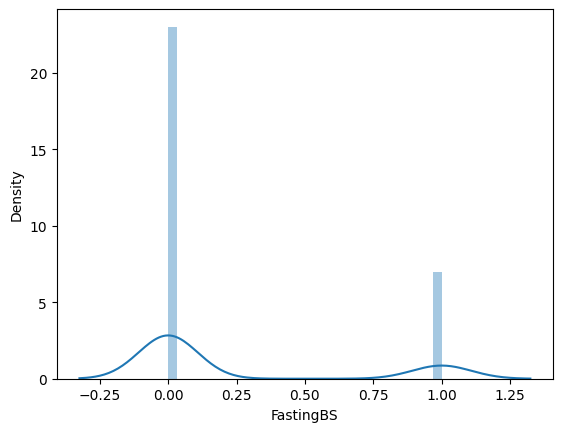

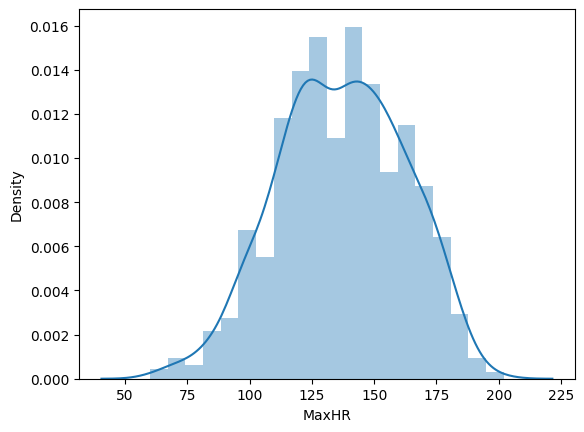

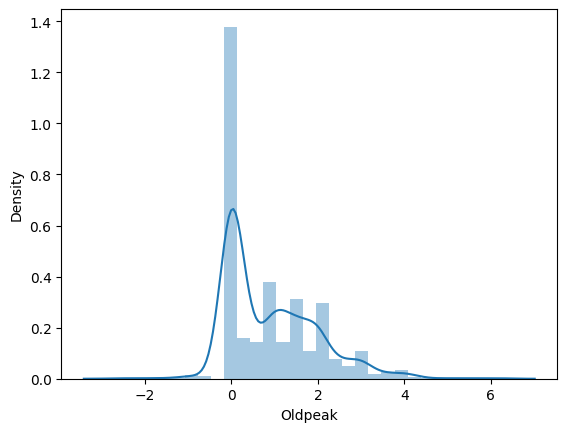

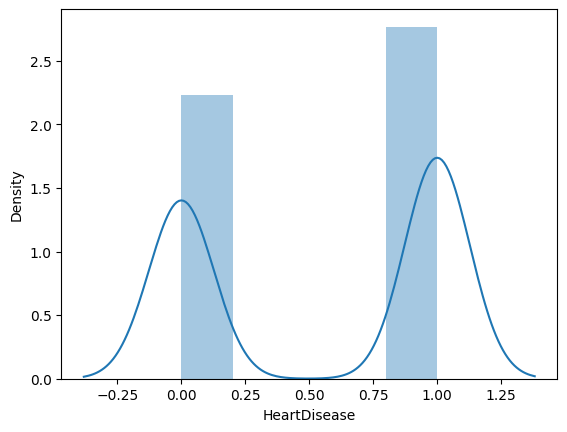

In [ ]:
for col in df.select_dtypes(include=['float', 'int']):
    plt.figure()
    sns.distplot(df[col])

## **6. Visualisation des variables qualitatives**

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50}{df[col].unique()}')

Sex-----------------------------------------------['M' 'F']
ChestPainType-------------------------------------['ATA' 'NAP' 'ASY' 'TA']
RestingECG----------------------------------------['Normal' 'ST' 'LVH']
ExerciseAngina------------------------------------['N' 'Y']
ST_Slope------------------------------------------['Up' 'Flat' 'Down']


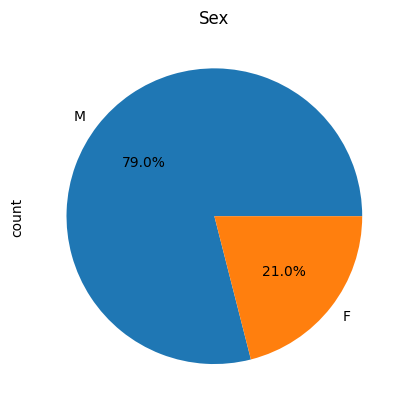

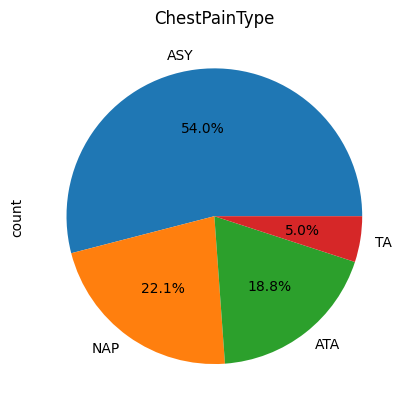

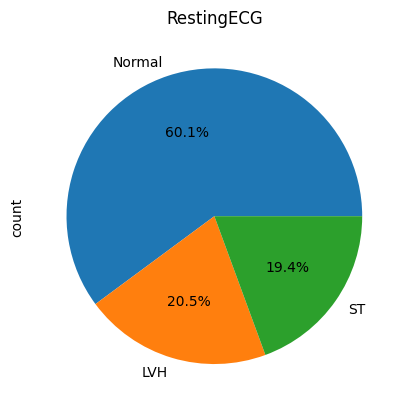

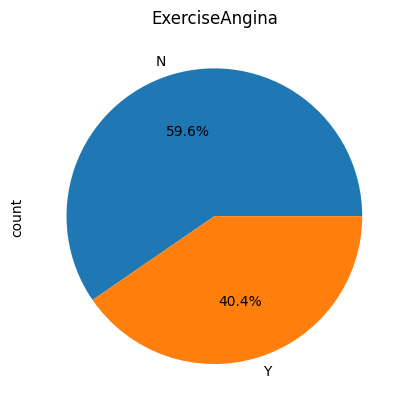

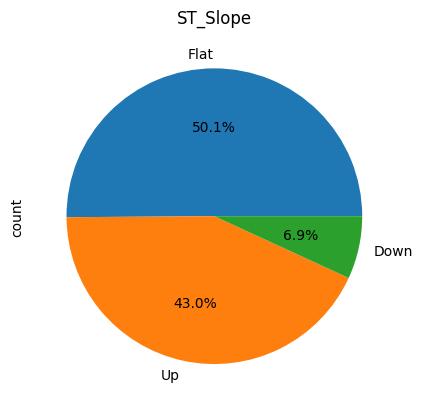

In [ ]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().sort_values(ascending=False)[:10].plot.pie(autopct='%1.1f%%')
    plt.title(col)

## **7. Relation Variables / Target**
### **Création de sous-ensembles positif et négatif**

In [ ]:
positive_df=df[df[target_feature]==1]
negative_df=df[df[target_feature]==0]

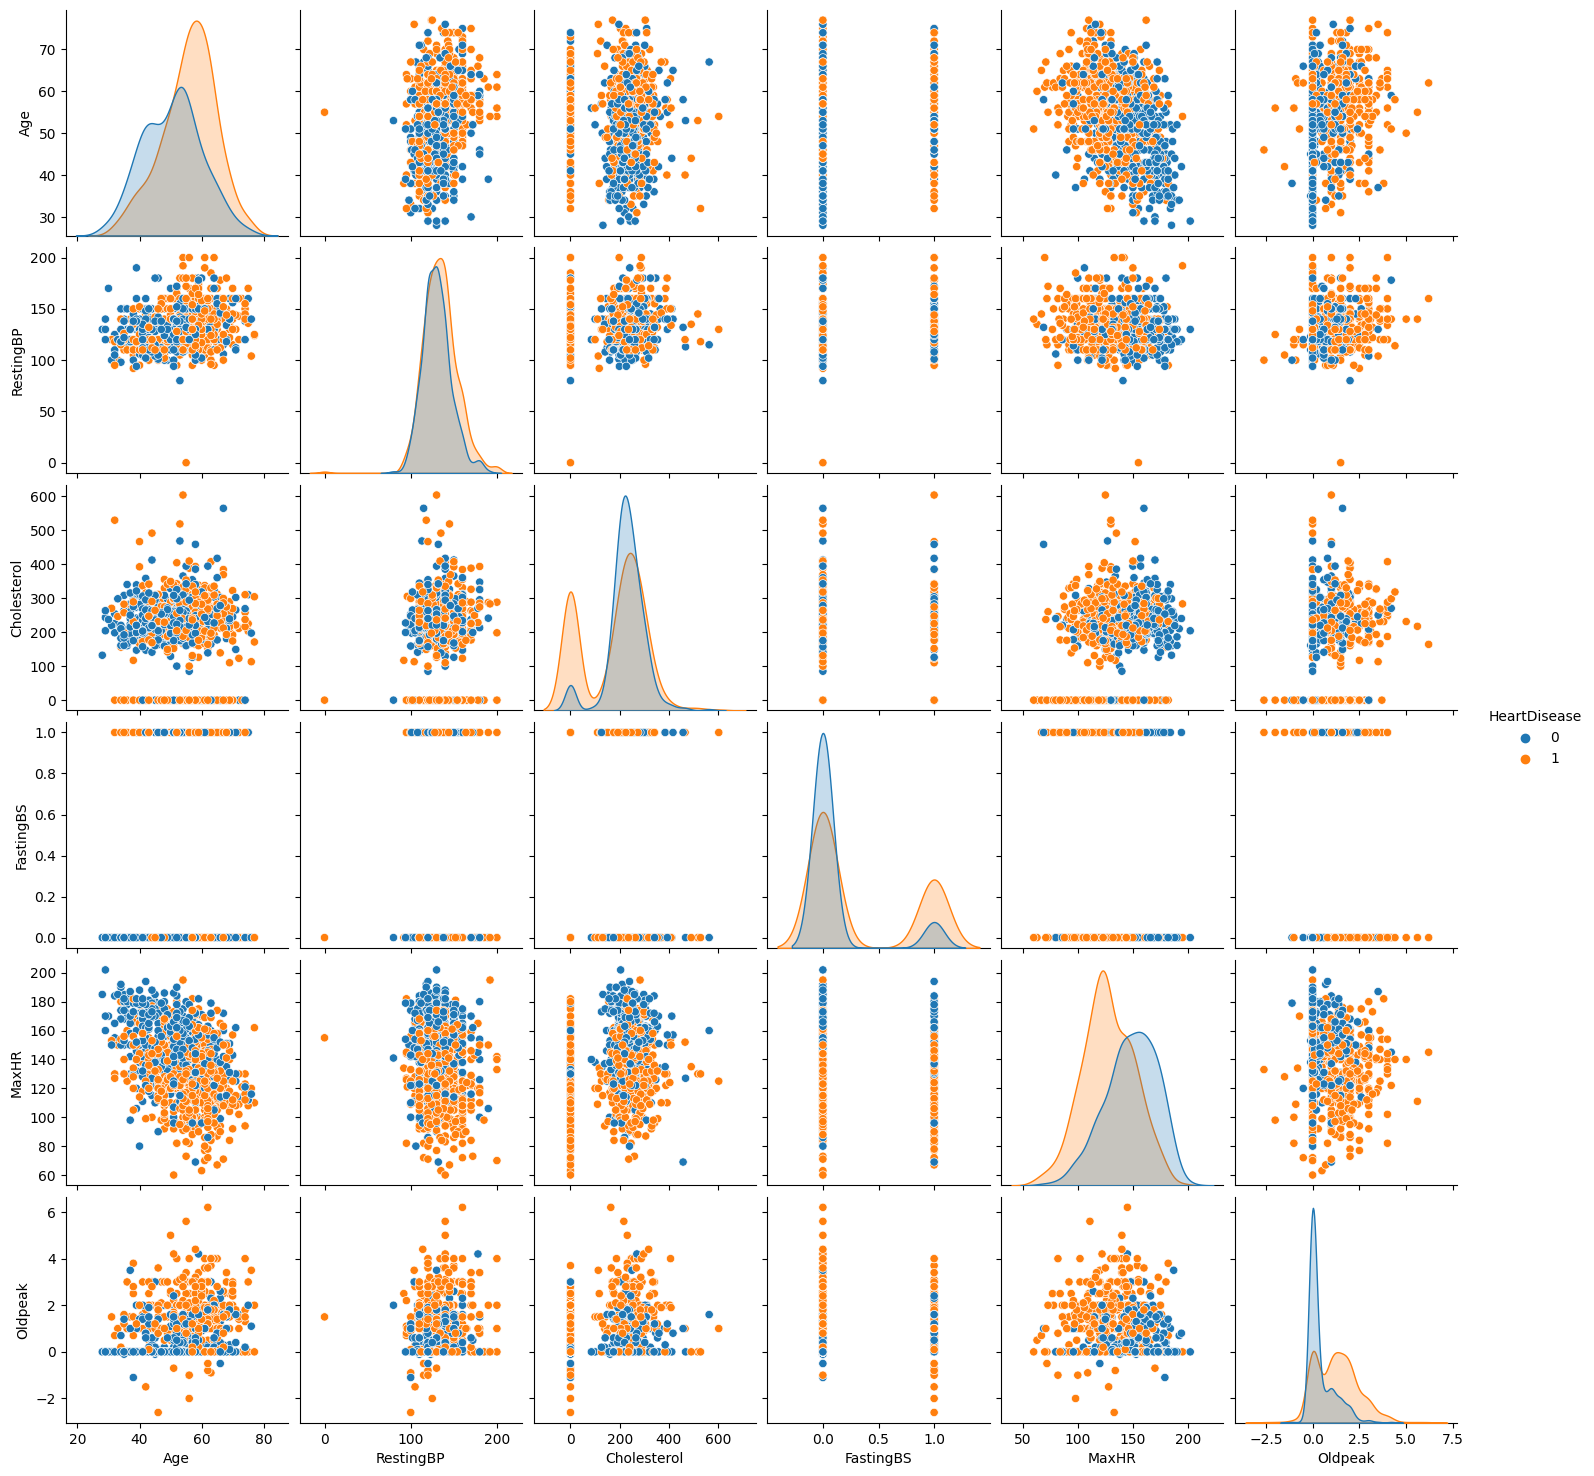

In [ ]:
sns.pairplot(df,hue=target_feature)

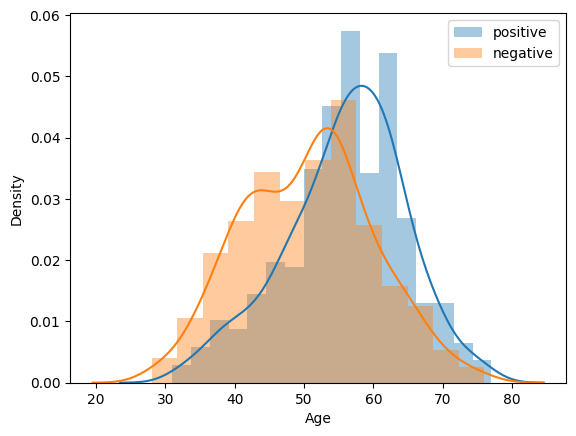

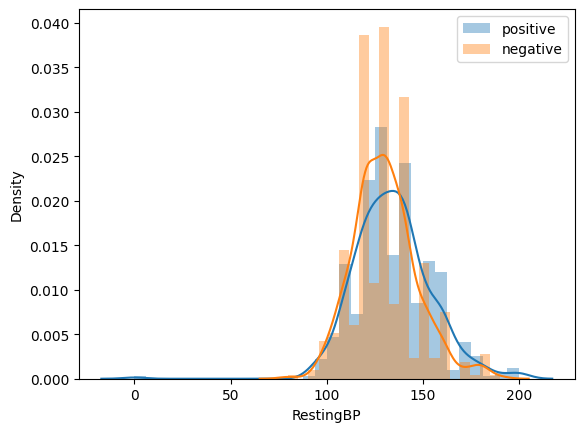

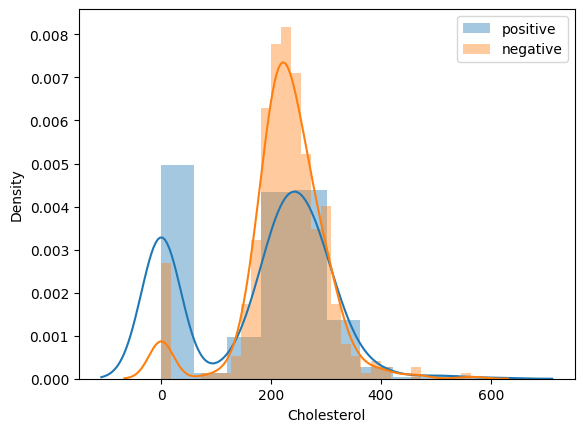

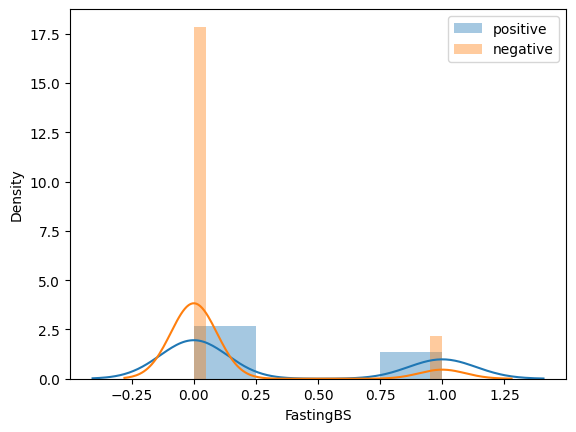

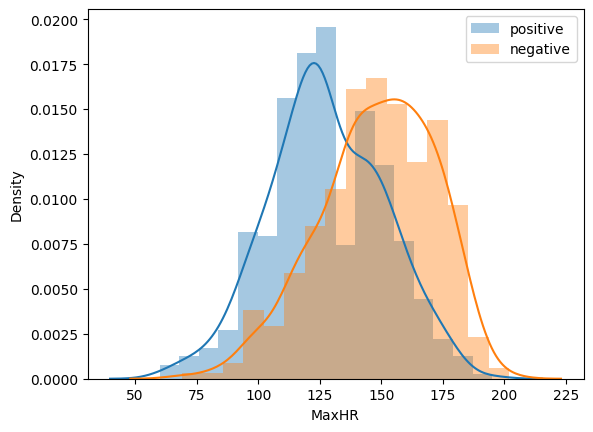

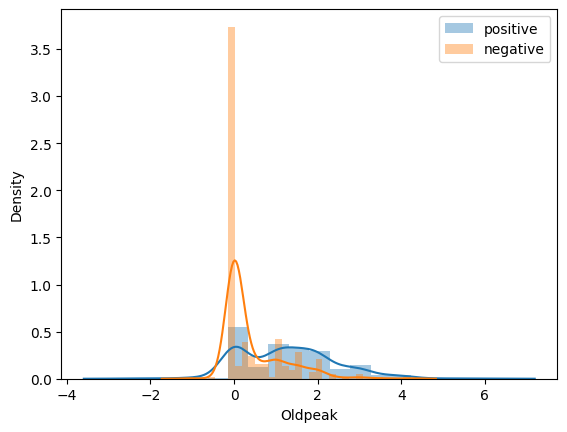

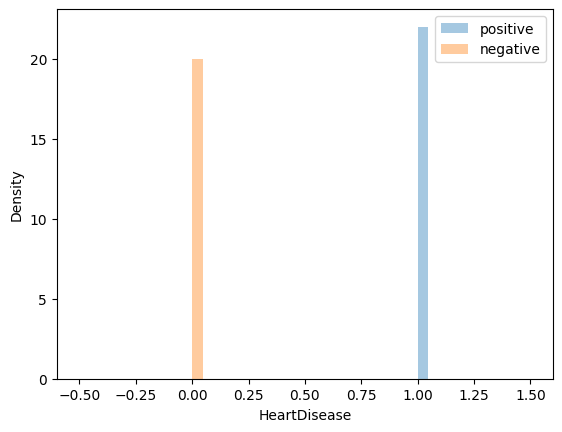

In [ ]:
for col in df.select_dtypes(include=['float', 'int']):
    plt.figure()
    sns.distplot(positive_df[col],label='positive')
    sns.distplot(negative_df[col],label='negative')
    plt.legend()

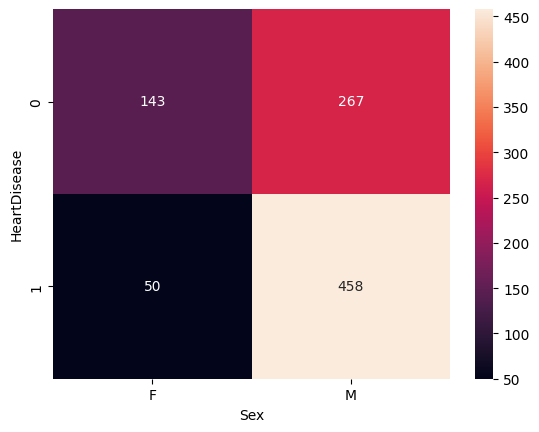

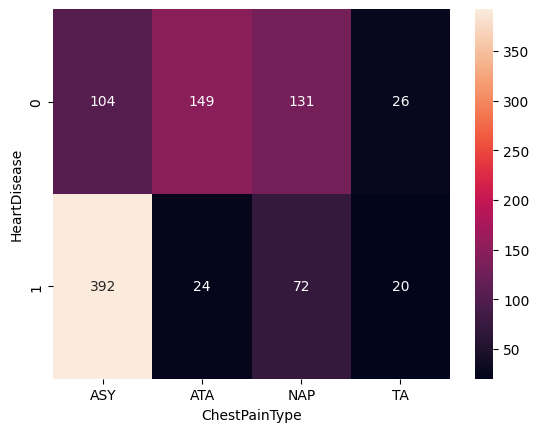

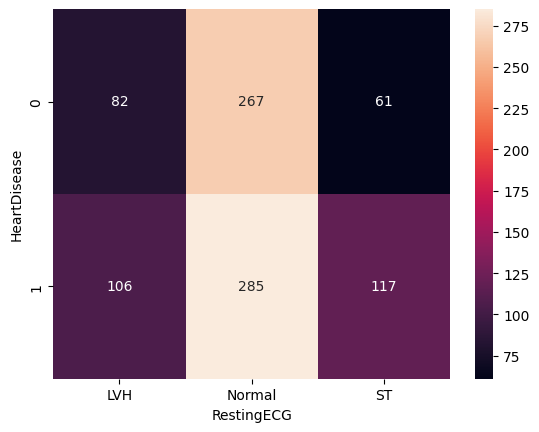

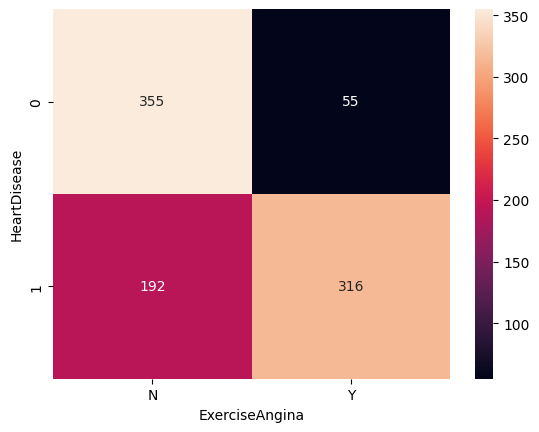

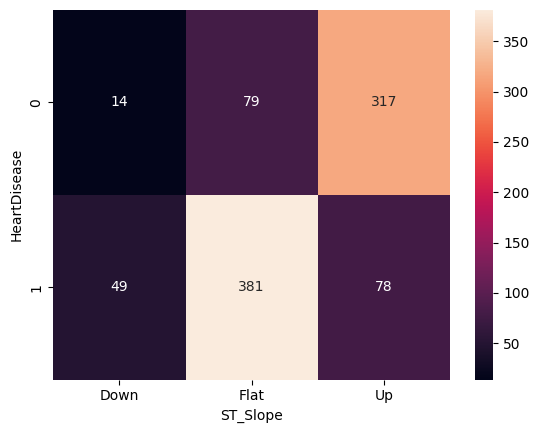

In [ ]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df[target_feature],df[col]),annot=True,fmt='d')

## **8. Relation Variable / Variable**

<Axes: >

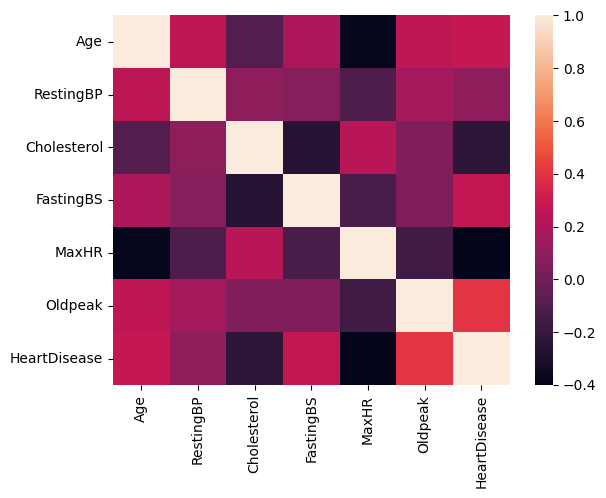

In [ ]:
sns.heatmap(df.select_dtypes(include=['float', 'int']).corr())

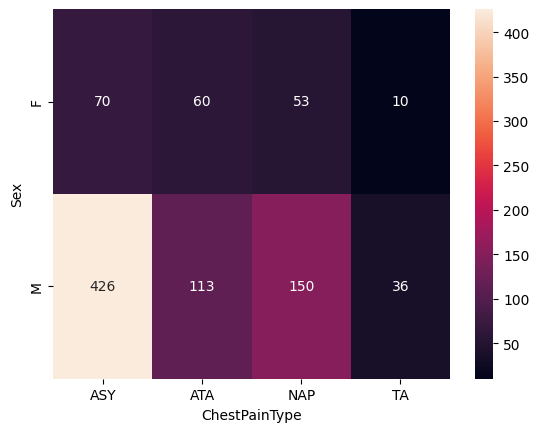

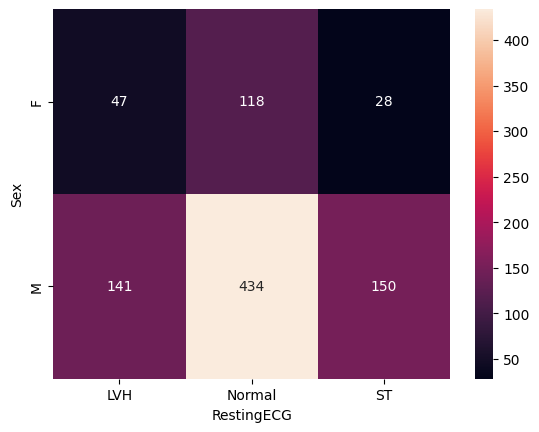

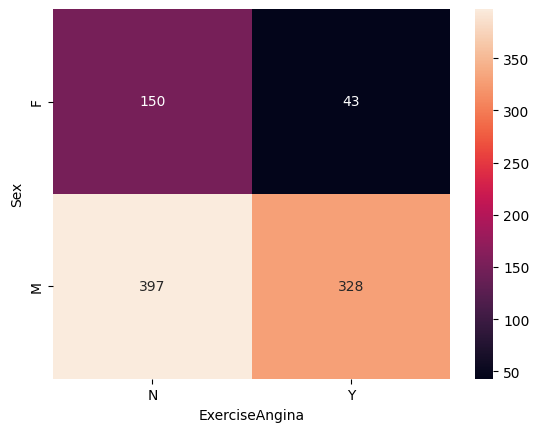

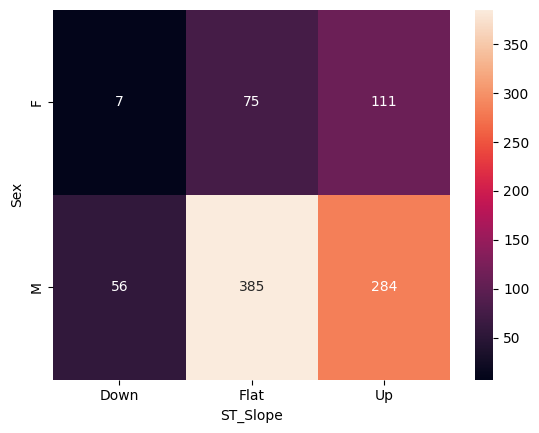

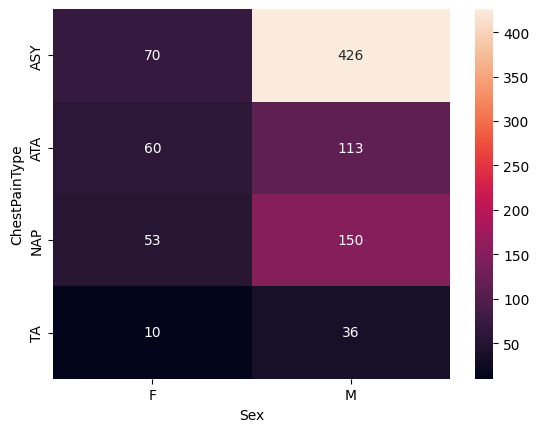

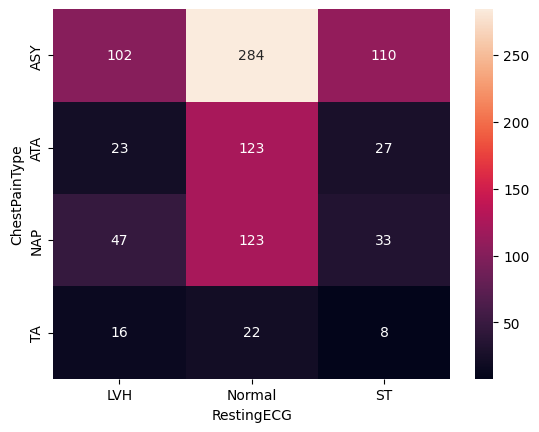

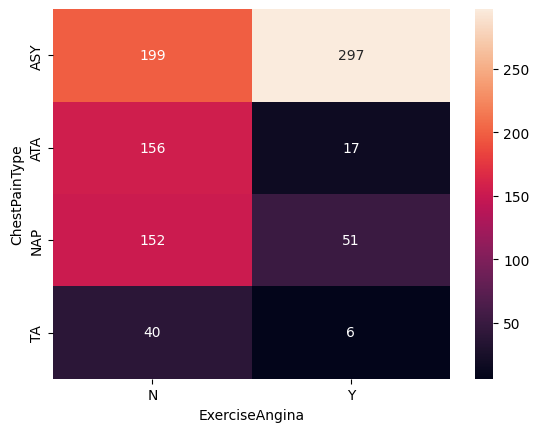

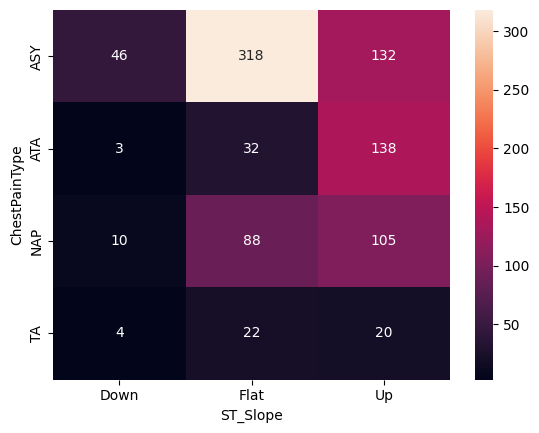

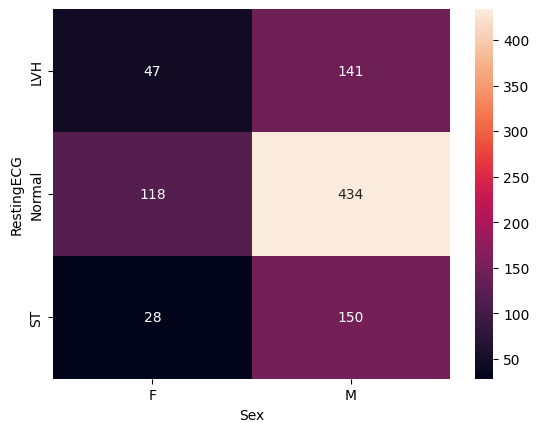

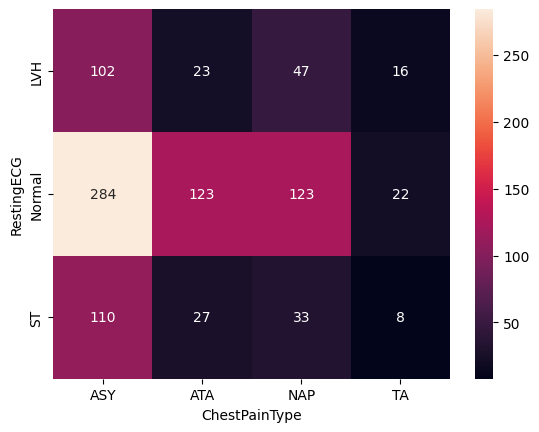

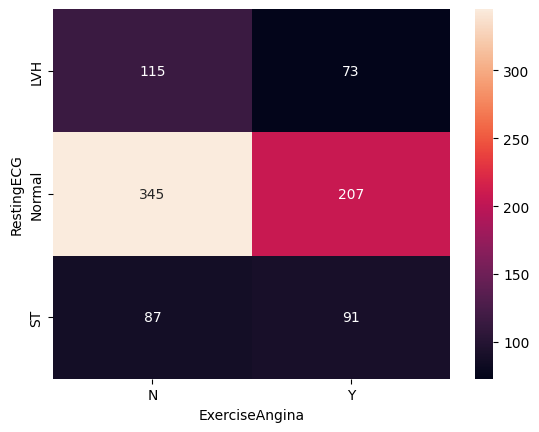

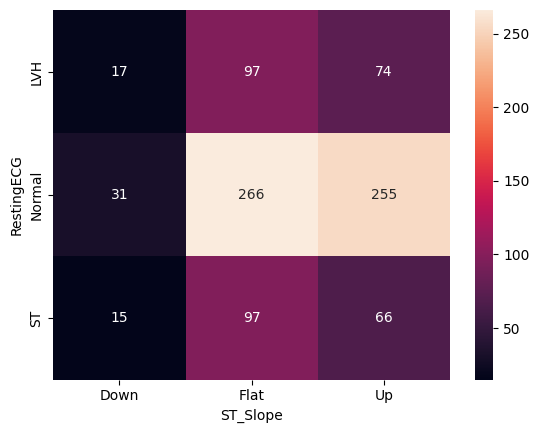

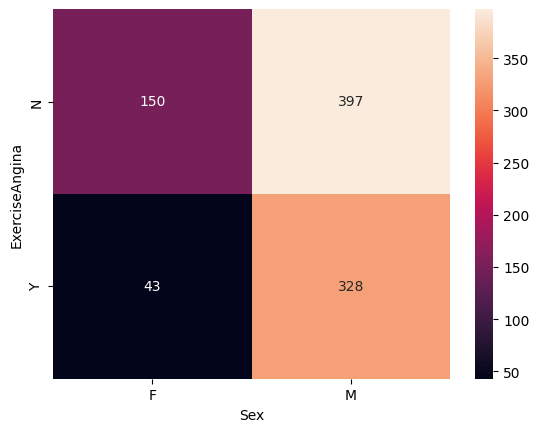

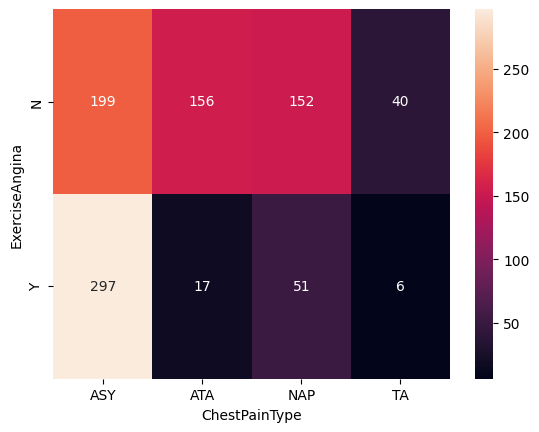

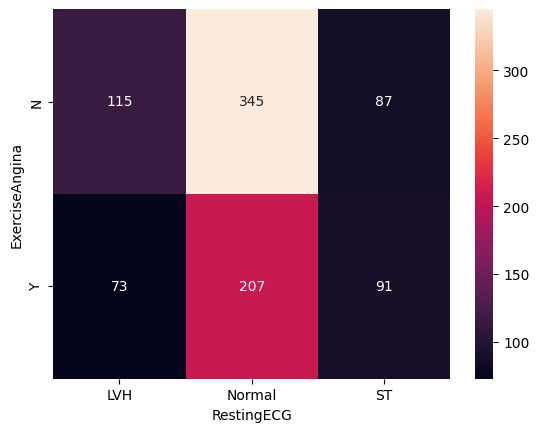

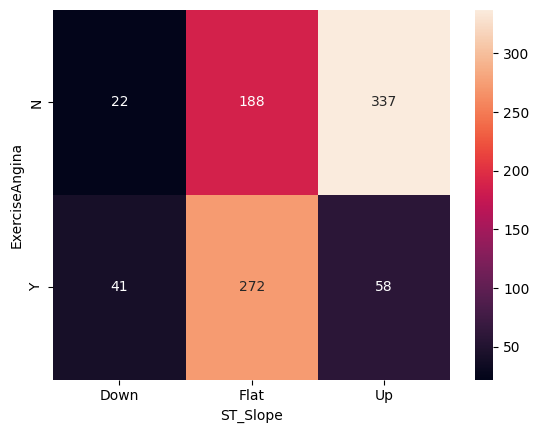

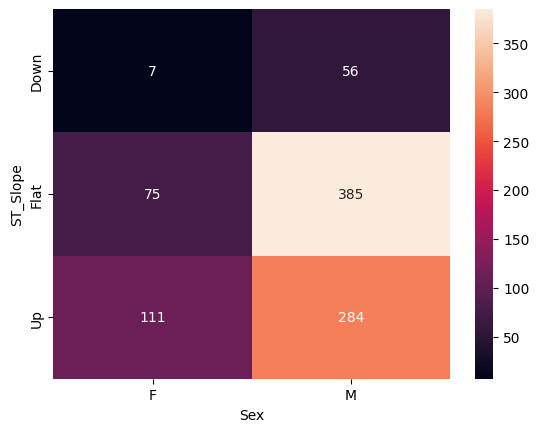

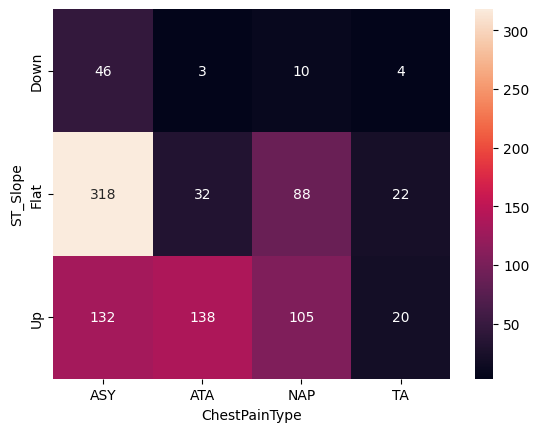

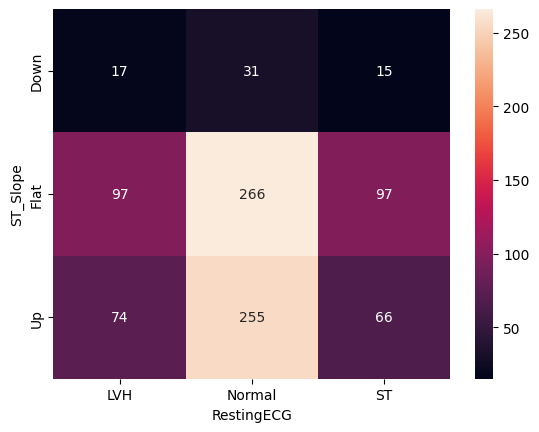

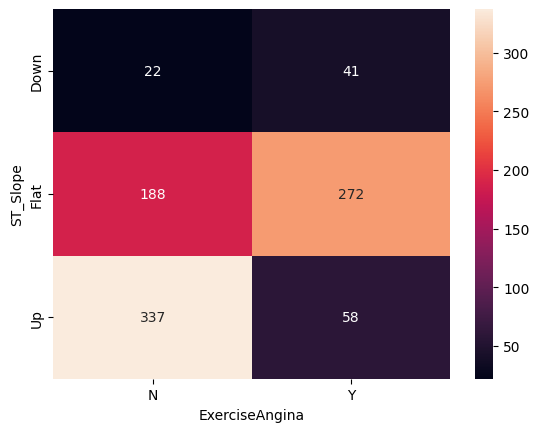

In [ ]:
for col1 in df.select_dtypes('object'):
    for col2 in df.select_dtypes('object'):
        if col1 != col2:
            plt.figure()
            sns.heatmap(pd.crosstab(df[col1],df[col2]),annot=True,fmt='d')

# 3. Pre-processing
**Objectif** : Transformer le dataset pour le préparer au Machine Learning

* **Objectif 1: mettre les données dans un format propice au ML**
    * Train / Test
    * Encodage
    * Nettoyage des NaN

--> premier modèle : évaluation - diagnostic

* **Objectif 2 : améliorer la performance du modèle**
    * Feature Selection
    * Feature Engineering
    * Feature Scaling
    * Suppression des Outliers

## **1. Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
trainset,testset=train_test_split(df,test_size=0.2,random_state=42)

In [ ]:
print(f'Les proportions de {target_feature} dans le trainset sont :\n')
trainset[target_feature].value_counts()

Les proportions de HeartDisease dans le trainset sont :



HeartDisease
1    401
0    333
Name: count, dtype: int64

In [ ]:
print(f'Les proportions de {target_feature} dans le testset sont :\n')
testset[target_feature].value_counts()

Les proportions de HeartDisease dans le testset sont :



HeartDisease
1    107
0     77
Name: count, dtype: int64

## **2. Encodage**

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50}{df[col].unique()}')

Sex-----------------------------------------------['M' 'F']
ChestPainType-------------------------------------['ATA' 'NAP' 'ASY' 'TA']
RestingECG----------------------------------------['Normal' 'ST' 'LVH']
ExerciseAngina------------------------------------['N' 'Y']
ST_Slope------------------------------------------['Up' 'Flat' 'Down']


In [ ]:
def encodage(df):
    df = df.copy()
    code={'F':1,
     'M':0,
     'Y':1,
     'N':0}

    mean_pain = trainset.groupby('ChestPainType')[target_feature].mean()
    mean_ECG = trainset.groupby('RestingECG')[target_feature].mean()
    mean_Slope = trainset.groupby('ST_Slope')[target_feature].mean()


    df['Sex'] = df['Sex'].map(code)
    df['ExerciseAngina']=df['ExerciseAngina'].map(code)
    df['ChestPainType']=df['ChestPainType'].map(mean_pain)
    df['RestingECG']=df['RestingECG'].map(mean_ECG)
    df['ST_Slope']=df['ST_Slope'].map(mean_Slope)

    return df

In [ ]:
def preprocessing(df):
    df = df.copy()
    df=encodage(df)

    X=df.drop(target_feature,axis=1)
    y=df[target_feature]

    return X,y

In [ ]:
X_train,y_train=preprocessing(trainset)
X_test,y_test=preprocessing(testset)

In [ ]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,0,0.364198,120,240,1,0.509009,194,0,0.8,0.770833
25,36,0,0.364198,130,209,0,0.509009,178,0,0.0,0.175896
84,56,0,0.770574,150,213,1,0.509009,125,1,1.0,0.817942
10,37,1,0.364198,130,211,0,0.509009,142,0,0.0,0.175896
344,51,0,0.770574,120,0,1,0.509009,104,0,0.0,0.817942
...,...,...,...,...,...,...,...,...,...,...,...
106,48,1,0.770574,120,254,0,0.645390,110,0,0.0,0.175896
270,45,0,0.770574,120,225,0,0.509009,140,0,0.0,0.175896
860,60,0,0.770574,130,253,0,0.509009,144,1,1.4,0.175896
435,60,0,0.770574,152,0,0,0.645390,118,1,0.0,0.175896


# **4. Modelisation**

**Objectif** : développer un modèle de Machine Learning
 qui réponde à l'objectif final

* Définir une fonction d'évaluation :

* Entrainement de différents modèles
   (precision Recall F1-score)
  * RandomForest : 0.91      0.89      0.90
  * AdaBoost : 0.90      0.84      0.87
  * SVM : 0.89      0.87      0.88
  * KNN : 0.92      0.87      0.89
  * On continue avec AdaBoost (le moins en overfit)
* Optimisation avec GridSearchCV
   * {'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3), 'adaboostclassifier__learning_rate': 0.01, 'adaboostclassifier__n_estimators': 200}
   * score du best_estimator : 0.90      0.89      0.89   
                
* (Optionnel) Analyse des erreurs et retour au Preprocessing/EDA
* Learning Curve et prise de décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## **1. Procédure d'évaluation**

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    N,train_score,val_score=learning_curve(model,X_train,y_train,
                                            cv=5,scoring='accuracy',
                                            train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N,train_score.mean(axis=1),label='train score')
    plt.plot(N,val_score.mean(axis=1),label='validation score')
    plt.legend()

## **2. Entrainement de différents modèles**

In [ ]:
preprocessor=make_pipeline(StandardScaler())

In [ ]:
RandomForest=make_pipeline(preprocessor,RandomForestClassifier(random_state=42))
AdaBoost=make_pipeline(preprocessor, AdaBoostClassifier(random_state=42))
SVM=make_pipeline(preprocessor,StandardScaler(),SVC(random_state=42))
KNN=make_pipeline(preprocessor,StandardScaler(),KNeighborsClassifier())

list_of_models={'RandomForest':RandomForest,
                'AdaBoost':AdaBoost,
                'SVM':SVM,
                'KNN':KNN}

RandomForest
[[68  9]
 [12 95]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

AdaBoost
[[67 10]
 [17 90]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

SVM
[[66 11]
 [14 93]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86  

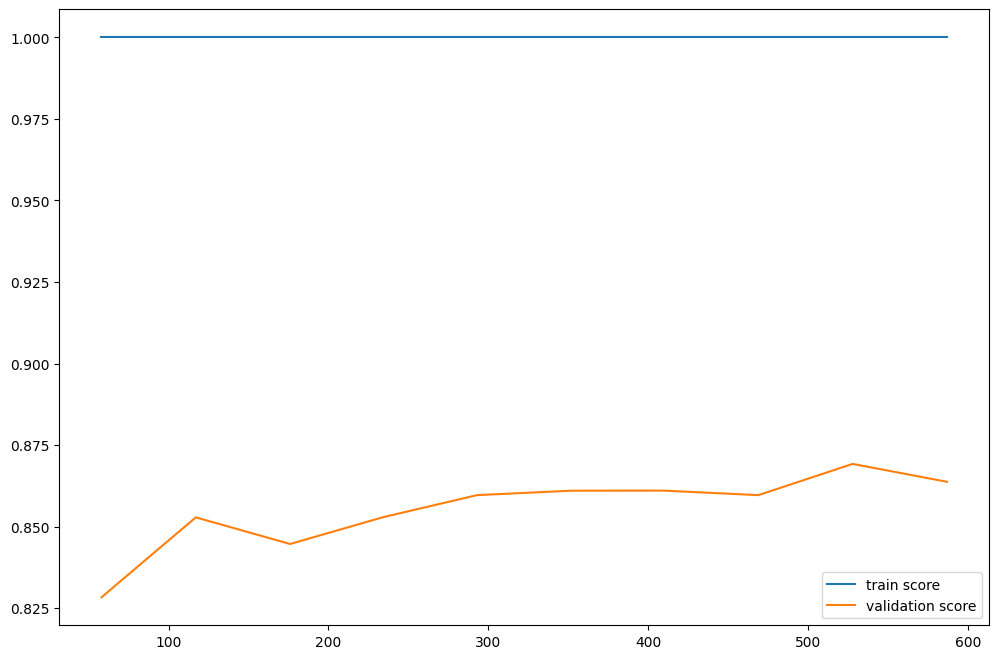

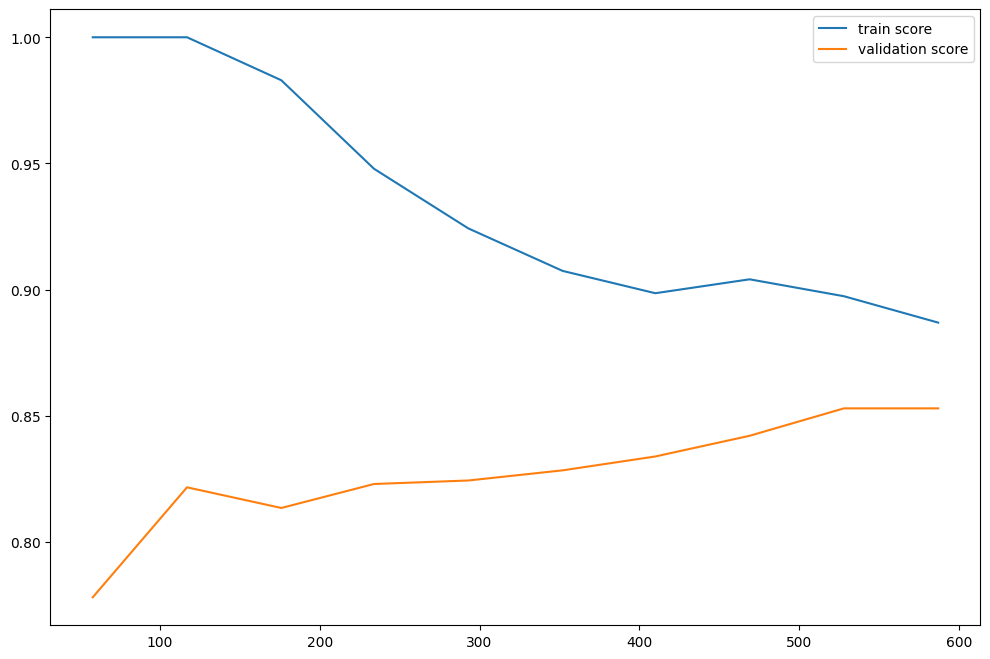

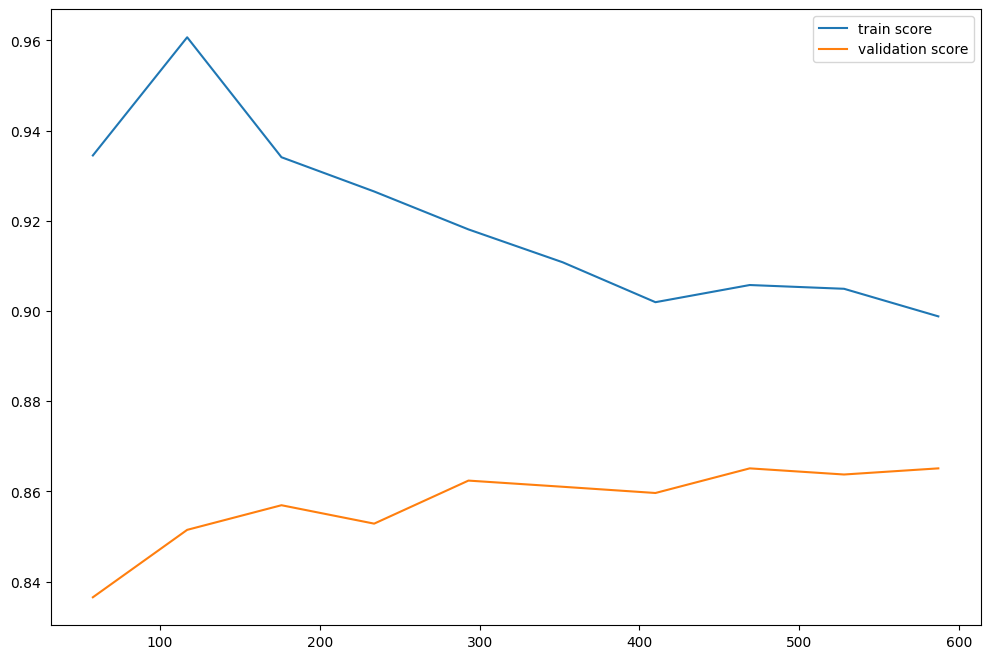

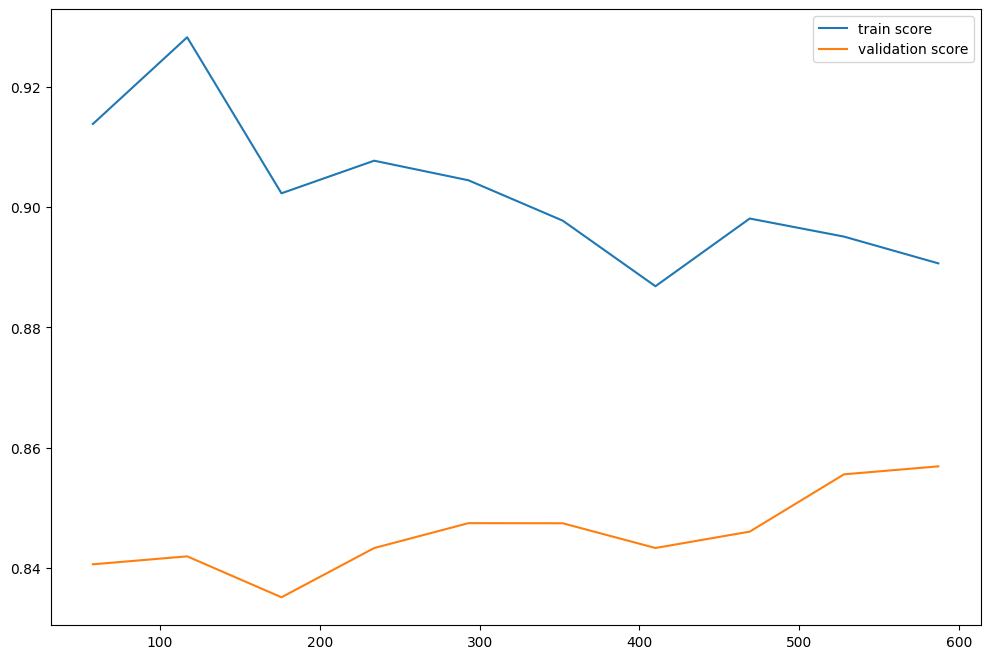

In [ ]:
for name,model in list_of_models.items():
    print(name)
    evaluation(model)

## **3. Optimisation**

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
AdaBoost.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('standardscaler', StandardScaler())])),
  ('adaboostclassifier', AdaBoostClassifier(random_state=42))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('standardscaler', StandardScaler())]),
 'adaboostclassifier': AdaBoostClassifier(random_state=42),
 'pipeline__memory': None,
 'pipeline__steps': [('standardscaler', StandardScaler())],
 'pipeline__verbose': False,
 'pipeline__standardscaler': StandardScaler(),
 'pipeline__standardscaler__copy': True,
 'pipeline__standardscaler__with_mean': True,
 'pipeline__standardscaler__with_std': True,
 'adaboostclassifier__algorithm': 'SAMME.R',
 'adaboostclassifier__base_estimator': 'deprecated',
 'adaboostclassifier__estimator': None,
 'adaboostclassifier__learning_rate': 1.0,
 'adaboostclassifier__n_estimators': 50,
 'adaboostclassifier__random_state': 42}

In [ ]:
hyper_params={
    'adaboostclassifier__base_estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3)
    ],
    'adaboostclassifier__n_estimators': [50, 100, 200],
    'adaboostclassifier__learning_rate': [0.01, 0.1, 0.5, 1.0]
}

In [ ]:
grid=GridSearchCV(AdaBoost,hyper_params,scoring='accuracy',cv=5)

grid.fit(X_train,y_train)

print(grid.best_params_)

y_pred=grid.predict(X_test)

print(classification_report(y_test,y_pred))

{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3), 'adaboostclassifier__learning_rate': 0.01, 'adaboostclassifier__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



[[66 11]
 [12 95]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



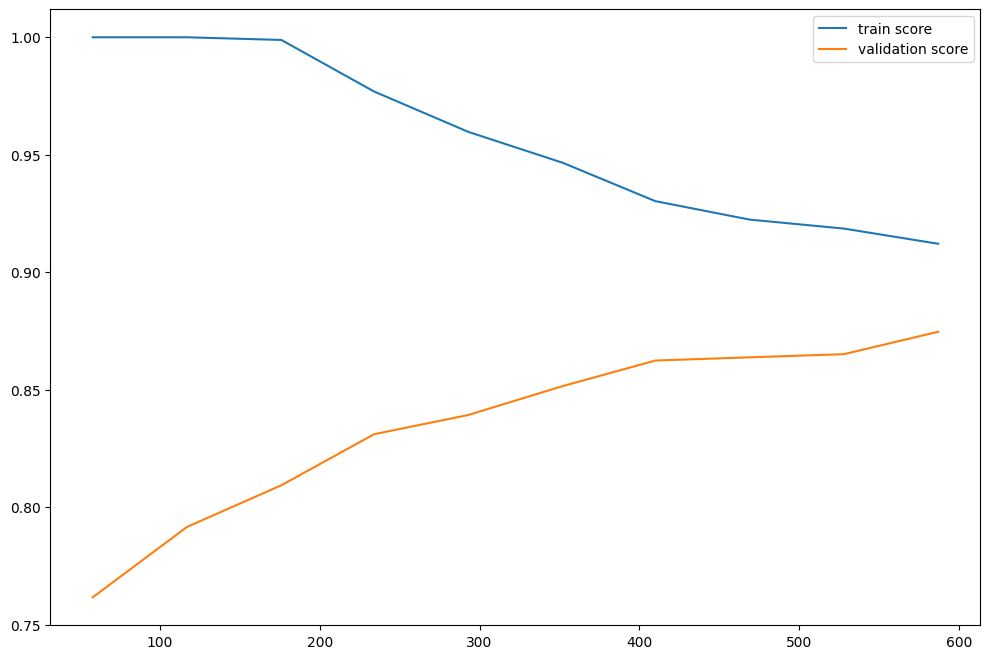

In [ ]:
evaluation(grid.best_estimator_)

## **4. Precision Recall Curve**

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision,recall,threshold=precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

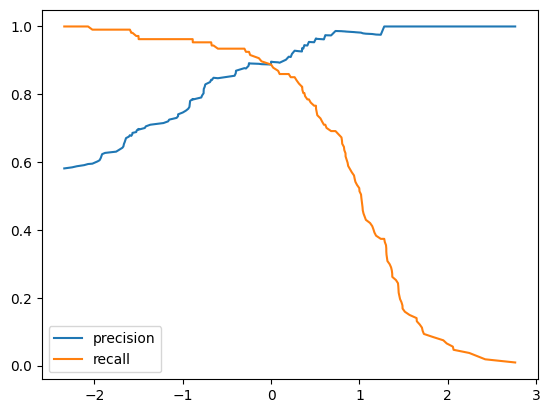

In [ ]:
plt.plot(threshold,precision[:-1],label='precision')
plt.plot(threshold,recall[:-1],label='recall')

plt.legend()

## **5. Prediction sur le testset**

In [ ]:
y_pred = grid.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy sur le test set : {:.2f}%".format(accuracy * 100))

Accuracy sur le test set : 87.50%
